In [3]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
 
file_names = ['97.mat','105.mat','118.mat','130.mat','169.mat','185.mat','197.mat','209.mat','222.mat','234.mat']
 
for file in file_names:
    # 读取MAT文件
    data = loadmat(f'../data_files/ODS\\{file}')
    print(list(data.keys()))

['__header__', '__version__', '__globals__', 'X097_DE_time', 'X097_FE_time', 'X097RPM']
['__header__', '__version__', '__globals__', 'X105_DE_time', 'X105_FE_time', 'X105_BA_time', 'X105RPM']
['__header__', '__version__', '__globals__', 'X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM']
['__header__', '__version__', '__globals__', 'X130_DE_time', 'X130_FE_time', 'X130_BA_time', 'X130RPM']
['__header__', '__version__', '__globals__', 'X169_DE_time', 'X169_FE_time', 'X169_BA_time', 'X169RPM']
['__header__', '__version__', '__globals__', 'X185_DE_time', 'X185_FE_time', 'X185_BA_time', 'X185RPM']
['__header__', '__version__', '__globals__', 'X197_DE_time', 'X197_FE_time', 'X197_BA_time', 'X197RPM']
['__header__', '__version__', '__globals__', 'X209_DE_time', 'X209_FE_time', 'X209_BA_time', 'X209RPM']
['__header__', '__version__', '__globals__', 'X222_DE_time', 'X222_FE_time', 'X222_BA_time', 'X222RPM']
['__header__', '__version__', '__globals__', 'X234_DE_time', 'X234_FE_time', 'X2

In [4]:
# 采用驱动端数据
data_columns = ['X097_DE_time', 'X105_DE_time', 'X118_DE_time', 'X130_DE_time', 'X169_DE_time',
                'X185_DE_time','X197_DE_time','X209_DE_time','X222_DE_time','X234_DE_time']
columns_name = ['97','105','118','130','169','185','197','209','222',"234"]
data_12k_10c = pd.DataFrame()
for index in range(10):
    # 读取MAT文件
    data = loadmat(f'../data_files/ODS\\{file_names[index]}')
    dataList = data[data_columns[index]].reshape(-1)
    data_12k_10c[columns_name[index]] = dataList[:119808]  # 121048  min: 121265
print(data_12k_10c.shape)
data_12k_10c

(119808, 10)


,97,105,118,130,169,185,197,209,222,234
0,0.053197,-0.083004,-0.002761,0.008528,-0.223836,-0.467813,0.002274,1.189431,-0.007959,0.104365
1,0.088662,-0.195734,-0.096324,0.423550,-0.209541,0.179004,-0.104948,-0.177866,0.025340,0.017462
2,0.099718,0.233419,0.113705,0.012995,0.345337,0.481295,0.082010,-0.774816,0.000162,0.116547
3,0.058621,0.103958,0.257297,-0.265175,0.158862,-0.158212,0.094027,0.501518,0.092913,0.371164
4,-0.004590,-0.181115,-0.058314,0.237155,-0.206617,-0.326819,-0.160081,0.993697,-0.007797,0.356951
...,...,...,...,...,...,...,...,...,...,...
119803,0.002712,0.046781,-0.239592,-0.122232,0.046781,-0.002274,-0.056920,-0.296850,0.018842,-0.024365
119804,0.016689,-0.071309,0.013482,-1.248720,-0.090314,-0.042883,0.048475,0.060913,-0.075370,-0.044264
119805,0.008762,-0.175917,0.217663,0.587609,0.026639,-0.027289,0.107100,0.148628,0.032162,0.042639
119806,-0.034004,-0.290759,-0.016081,0.352890,0.097136,-0.035736,-0.033332,-0.139288,0.152364,-0.059289


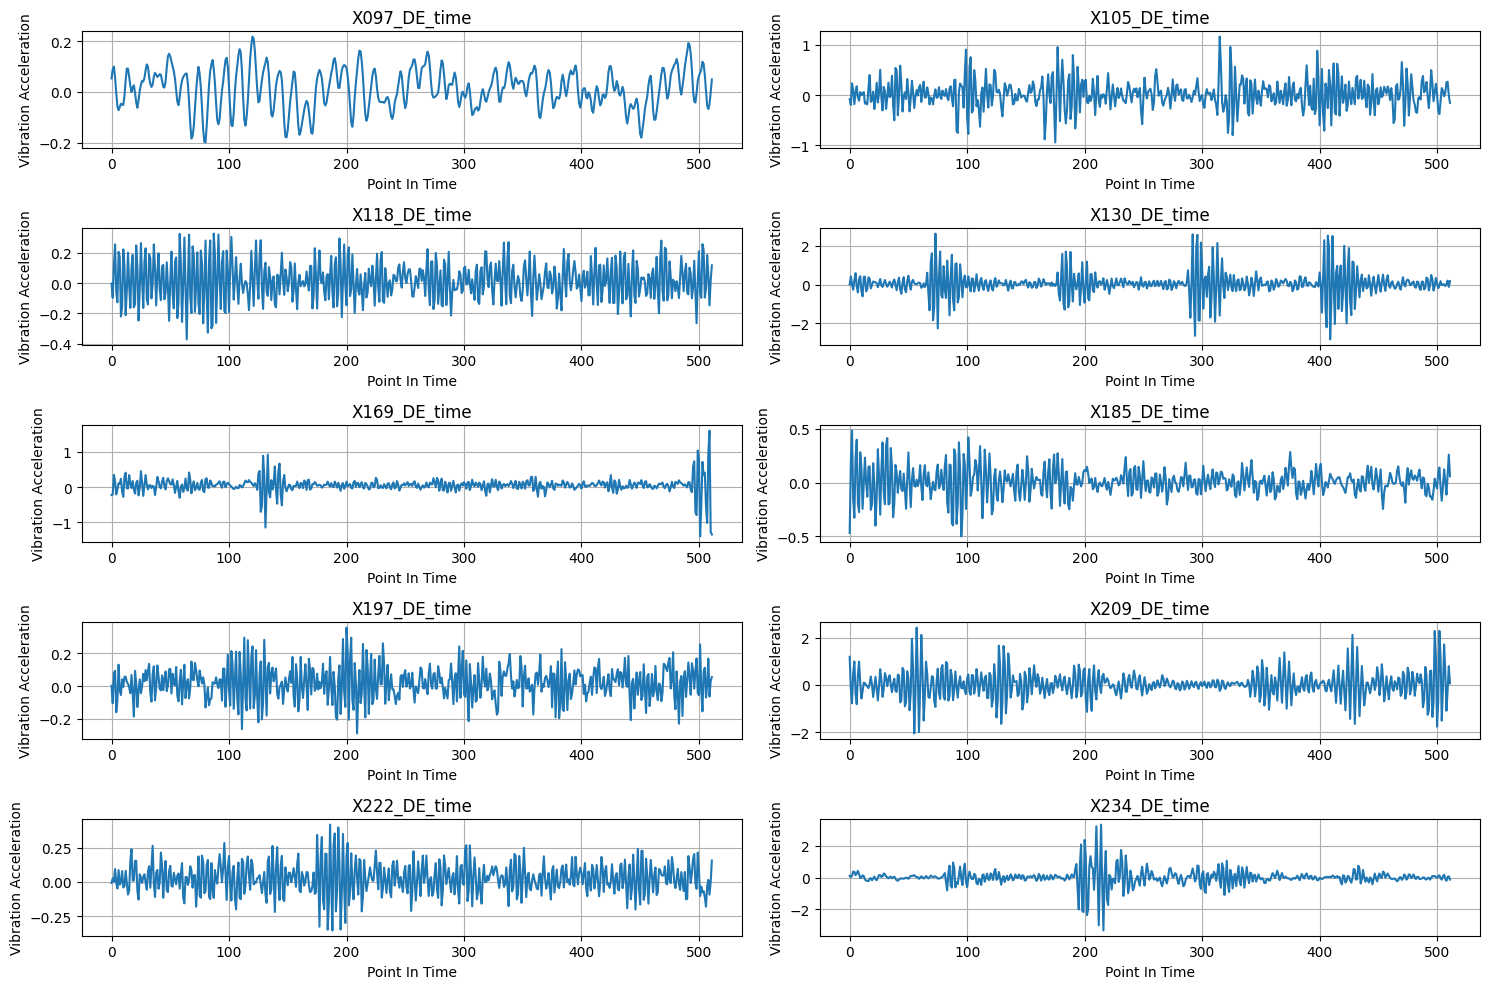

In [5]:
import matplotlib.pyplot as plt
# 创建一个包含10个子图的图表
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))  # 创建5行2列的子图
# 展示前10个子集，每个子集包含100个元素
for i, ax in enumerate(axes.flat):  # 扁平化子图数组，方便遍历
    series=data_12k_10c[columns_name[i]].iloc[:512]
    ax.plot(series.index, series.values)
    ax.set_title(data_columns[i])
    ax.set_xlabel('Point In Time')
    ax.set_ylabel('Vibration Acceleration')
    ax.grid(True)

# 调整子图之间的间距
plt.tight_layout()

# 显示图表
plt.show()
#看下时频图之间有较大区别，可使用一维时序转二维图像用于分类问题；

# 经验模态分解(EMD)
- 本质是将一个一维非平稳长向量转为一组为固有模态函数(INF)的短向量的集合(二维矩阵)的方法；

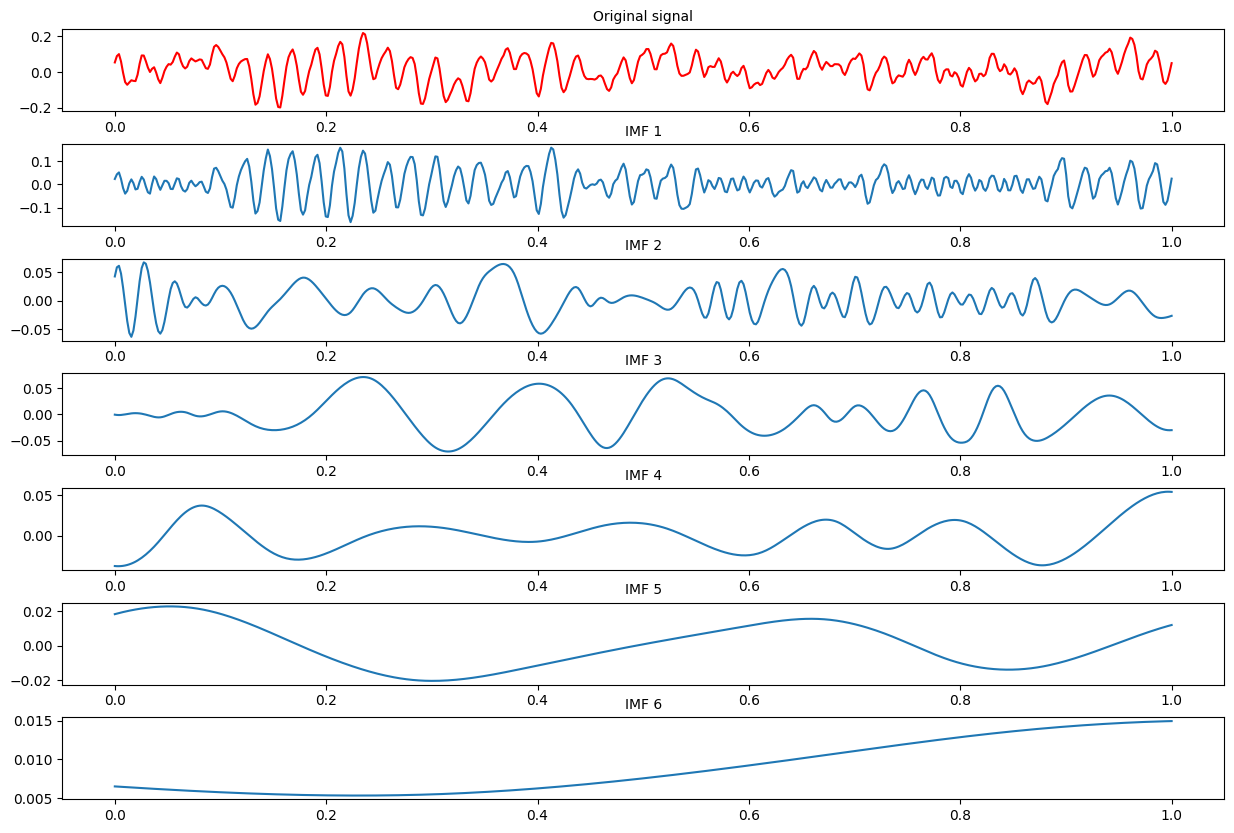

(6, 512)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD
 
t = np.linspace(0, 1, 512)
data = np.array(data_12k_10c[columns_name[0]].iloc[:512])
# 创建 EMD 对象
emd = EMD()
 
# 对信号进行经验模态分解
IMFs = emd(data)
 
# 绘制原始信号和每个本征模态函数（IMF）
plt.figure(figsize=(15,10))
plt.subplot(len(IMFs)+1, 1, 1)
plt.plot(t, data, 'r')
plt.title("Original signal", fontsize=10)
 
for num, imf in enumerate(IMFs):
    plt.subplot(len(IMFs)+1, 1, num+2)
    plt.plot(t, imf)
    plt.title("IMF "+str(num+1), fontsize=10)
    # 增加第一排图和第二排图之间的垂直间距
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()
IMFs.shape

In [9]:
# 定义滑动窗口大小和步长
window_size = 512
stride = int(window_size / 2)  # 此处使用了 50% 的重叠率
result_transpose_df=pd.DataFrame()
for futures_name in columns_name:
    data_array=data_12k_10c[futures_name]
    # 创建滑动窗口
    rolling_window = np.lib.stride_tricks.sliding_window_view(data_array, window_shape=window_size)
    # 提取具有给定步长的子数组
    rolling_window = rolling_window[::stride]
    for window_data in rolling_window:
        arr=window_data
        scalar_value = float(futures_name)
        # 使用 concatenate() 函数将标量追加到数组末尾
        new_arr = np.concatenate([arr, [scalar_value]])
        rolling_window_df=pd.DataFrame(new_arr)
                # 将滑动窗口中的数据组合成一个新的 DataFrame 对象
        result_transpose_df = pd.concat([result_transpose_df, rolling_window_df], axis=1, ignore_index=True)

result_df=result_transpose_df.transpose()
y_temp = result_df.iloc[:, -1:]
# 删除最后一列
result_df.drop(result_df.columns[-1], axis=1, inplace=True)
y_temp,result_df

(        512
 0      97.0
 1      97.0
 2      97.0
 3      97.0
 4      97.0
 ...     ...
 4665  234.0
 4666  234.0
 4667  234.0
 4668  234.0
 4669  234.0
 
 [4670 rows x 1 columns],
            0         1         2         3         4         5         6    \
 0     0.053197  0.088662  0.099718  0.058621 -0.004590 -0.056952 -0.071764   
 1     0.106602  0.127881  0.128090  0.101387  0.056535  0.015438  0.014812   
 2     0.077396  0.096589  0.098258  0.083863  0.036090 -0.037759 -0.093877   
 3     0.052988  0.019610 -0.000209  0.003964  0.002086  0.006258 -0.014186   
 4     0.134766  0.085115  0.015020 -0.029623 -0.040263 -0.015229  0.012308   
 ...        ...       ...       ...       ...       ...       ...       ...   
 4665  0.058071  0.036954  0.109644  0.161217  0.204262  0.098273 -0.116953   
 4666 -0.182740  0.624563  1.323034 -0.688725 -0.784968  2.427187  1.570342   
 4667 -0.108019 -0.129542 -0.032487 -0.023959 -0.091776 -0.034924  0.153095   
 4668 -0.025177 -0.126293 

In [20]:
import numpy as np
from PyEMD import EMD
from collections import Counter  
data=np.array(result_df)
# 创建 EMD 对象
ls=[]
emd = EMD()
all_imfs=[]
for i in range(len(data)):
    imfs = emd(data[i], max_imf=8) #一个长序列固有模态函数最大8个
    ls.append(len(imfs))
    all_imfs.append(imfs)
counter = Counter(ls)
counter

Counter({7: 3141, 8: 973, 6: 538, 5: 17, 9: 1})

由结果可以看出，大部分信号样本 都分解出7个分量，将近1/3的信号分解的不是7个分量。EMD设置不了分解出模态分量的数量（函数自适应），为了使一维信号分解，达到相同维度的分量特征，有如下3种处理方式：

- 删除分解分量不统一的样本（少量存在情况可以采用）；

- 对于分量个数少的样本采用0值或者其他方法进行特征填充，使其对齐其他样本分量的维度（向多兼容，我的选择）；

- 合并分量数量多的信号（向少兼容）；


In [27]:
all_imfs_new=[]
for i in range(len(all_imfs)):
    imfs=all_imfs[i]
    if len(imfs) > 8 :
        all_imfs_new.append(imfs[0:7])
    elif len(imfs) < 7:
        pass
    elif len(imfs) == 7:
        all_imfs_new.append(imfs)

[array([[ 0.05469388,  0.07396123,  0.07395498, ..., -0.00586525,
          0.02072837,  0.0142553 ],
        [ 0.01202668,  0.01245349,  0.00828047, ...,  0.01385353,
          0.02335041,  0.02319693],
        [-0.02279501, -0.02319531, -0.02042244, ..., -0.01001132,
         -0.01099759, -0.01082718],
        ...,
        [-0.01709793, -0.01724609, -0.01739441, ...,  0.00223328,
          0.0022779 ,  0.00231743],
        [ 0.00774655,  0.00781108,  0.00787374, ...,  0.00768327,
          0.00767295,  0.00766253],
        [ 0.01338886,  0.01338631,  0.01338373, ...,  0.01115198,
          0.01115133,  0.01115071]]),
 array([[ 0.10494535,  0.12581696,  0.12627393, ...,  0.03997004,
          0.07898644,  0.08025594],
        [-0.03500982, -0.03663943, -0.03523969, ...,  0.02916489,
          0.0360821 ,  0.04186161],
        [-0.01885327, -0.01957282, -0.02041792, ...,  0.01350369,
          0.01453937,  0.01545273],
        ...,
        [ 0.00549465,  0.0056474 ,  0.00579532, ...,  

In [28]:
import numpy as np
from PyEMD import EMD
from collections import Counter  
data=np.array(result_df)
# 创建 EMD 对象
ls=[]
emd = EMD()
all_imfs=[]
for i in range(len(all_imfs_new)):
    ls.append(len(all_imfs_new[i]))
counter = Counter(ls)
counter

Counter({7: 3142})